<a href="https://colab.research.google.com/github/A01795331/estefania/blob/main/Actividad4EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 4**
Exploración de datos

---

*   NOMBRE: Estefanía Amaya Rojas
*   MATRÍCULA: A01795331

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analítica de datos/Semana 4/Actividad4_EDA"
os.chdir(DIR)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("credit_risk_dataset.csv")
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


# **Parte 1**. Análisis descriptivo (univariante)

1. Utiliza el método `info()` del dataframe, para obtener el resumen de los tipos de datos. ¿Cuántas columnas son numéricas y cuántas cualitativas?

In [ ]:
resumen_data = df.info()
print(resumen_data)

columnas_num = df.select_dtypes(include='number').columns
columnas_cual = df.select_dtypes(include='object').columns
print(f"\nNúmero de columnas numéricas: {len(columnas_num)}")
print(f"Número de columnas cualitativas: {len(columnas_cual)}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB
None

Número de columnas numéri

 2. Determina el porcentaje de valores faltantes por columna.

In [ ]:
porc_faltantes = (df.isna().sum() / len(df)) * 100
print("Porcentaje de valores faltantes por columna:")
print(porc_faltantes)

Porcentaje de valores faltantes por columna:
person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
person_emp_length             2.747000
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_int_rate                 9.563856
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64


# Análisis de variables numéricas

3. Obtén las siguientes estadísticas descriptivas para todas las variables numéricas:
*   Tendencia central (media, mediana)
*   Dispersión o variabilidad (min, max, desviación estándar, cuartiles)
*   Forma (asimetría y curtosis)
*   Clasifica las variables `person_age` y `loan_in_rate` según los valores observados de asimetría y curtosis

**NOTA**. Recuerda que muchas de estas estadísticas, puedes obtenerlas utilizando la función `describe()` y que la mediana está representada en el 2do cuartil (50%)

In [ ]:
estadistica = df.describe()

# ************
asimetria = df.skew()
curtosis = df.kurtosis()
print("Estadísticas descriptivas para variables numéricas:")
print(estadistica)
print("\nAsimetría para variables numéricas:")
print(asimetria)
print("\nCurtosis para variables numéricas:")
print(curtosis)

# *********

# Asimetria
asimetria_person_age = df['person_age'].skew()
curtosis_person_age = df['person_age'].kurtosis()
asimetria_loan_int_rate = df['loan_int_rate'].skew()
curtosis_loan_int_rate = df['loan_int_rate'].kurtosis()

# Clasificación de asimetría
def clasificar_asimetria(valor):
    if valor > 0:
        return 'Positiva (cola derecha)'
    elif valor < 0:
        return 'Negativa (cola izquierda)'
    else:
        return 'Cercana a 0 (aproximadamente simétrica)'

# Clasificación de curtosis
def clasificar_curtosis(valor):
    if valor > 0:
        return 'Leptocúrtica (más puntiaguda)'
    elif valor < 0:
        return 'Platicúrtica (más aplanada)'
    else:
        return 'Mesocúrtica (normal)'

# Imprime los resultados
print(f"Asimetría para person_age: {asimetria_person_age}, Clasificación: {clasificar_asimetria(asimetria_person_age)}")
print(f"Curtosis para person_age: {curtosis_person_age}, Clasificación: {clasificar_curtosis(curtosis_person_age)}")

print(f"\nAsimetría para loan_int_rate: {asimetria_loan_int_rate}, Clasificación: {clasificar_asimetria(asimetria_loan_int_rate)}")
print(f"Curtosis para loan_int_rate: {curtosis_loan_int_rate}, Clasificación: {clasificar_curtosis(curtosis_loan_int_rate)}")


Estadísticas descriptivas para variables numéricas:
         person_age  person_income  person_emp_length     loan_amnt  \
count  32581.000000   3.258100e+04       31686.000000  32581.000000   
mean      27.734600   6.607485e+04           4.789686   9589.371106   
std        6.348078   6.198312e+04           4.142630   6322.086646   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.850000e+04           2.000000   5000.000000   
50%       26.000000   5.500000e+04           4.000000   8000.000000   
75%       30.000000   7.920000e+04           7.000000  12200.000000   
max      144.000000   6.000000e+06         123.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   29465.000000  32581.000000         32581.000000   
mean       11.011695      0.218164             0.170203   
std         3.240459      0.413006             0.106782   
min         5.420000      0.000000             0.000000   
25%         7

<ipython-input-21-f8c5a9b56e39>:4: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  asimetria = df.skew()
<ipython-input-21-f8c5a9b56e39>:5: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  curtosis = df.kurtosis()


4. Utiliza histogramas para determinar la distribución de los valores representados en cada variable.
*   ¿Se corresponde con lo obtenido en el cálculo de asimetría? Como verás, los datos reales son más complejos que la teoría. Por esta razón, recuerda siempre acompañar el análisis de la asimetría con algún gráfico como un histograma.

**NOTA**. Para esto también puedes ocupar los gráficos `kde` ([kernel density estimation](https://www.cienciadedatos.net/documentos/pystats02-kernel-density-estimation-kde-python.html)) que crean una curva continua y suave expandiendo la idea del histograma.

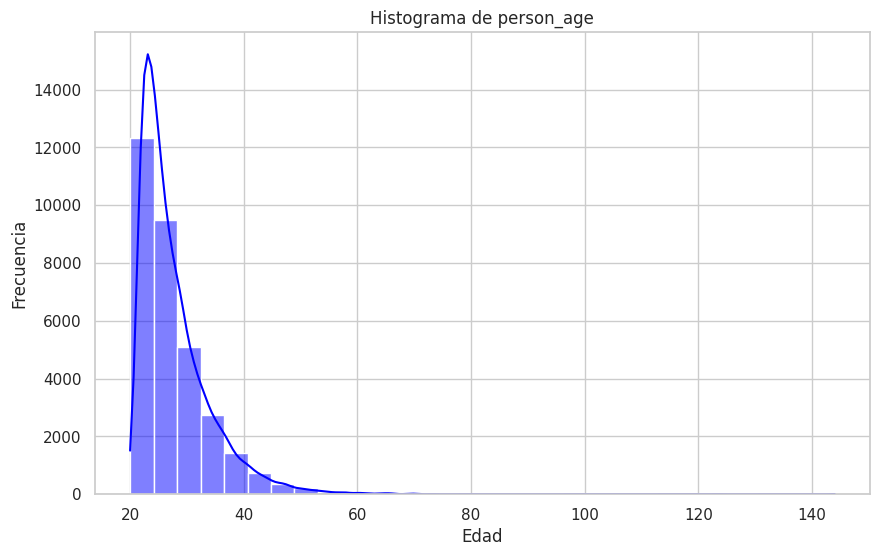

In [ ]:
# Histograma para person_age
plt.figure(figsize=(10, 6))
sns.histplot(df['person_age'], bins=30, kde=True, color='blue')
plt.title('Histograma de person_age')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


5. Emplea boxplots para mostrar la distribución de los datos a través de sus cuartiles.

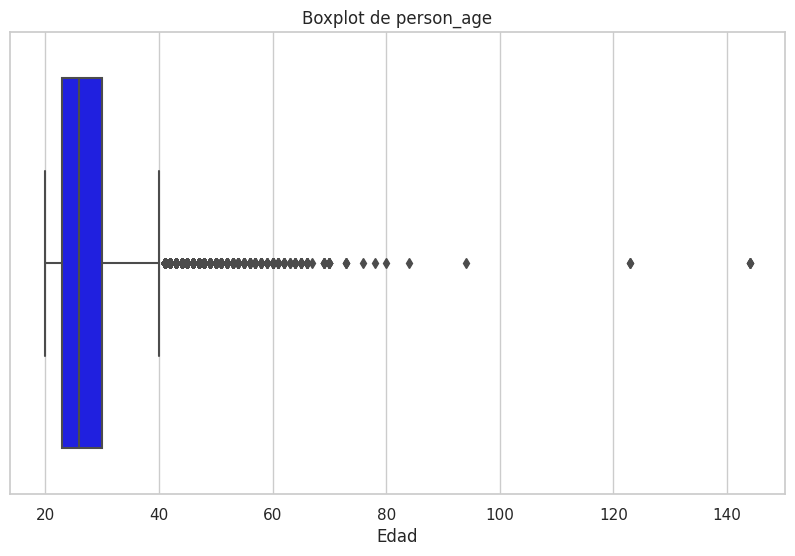

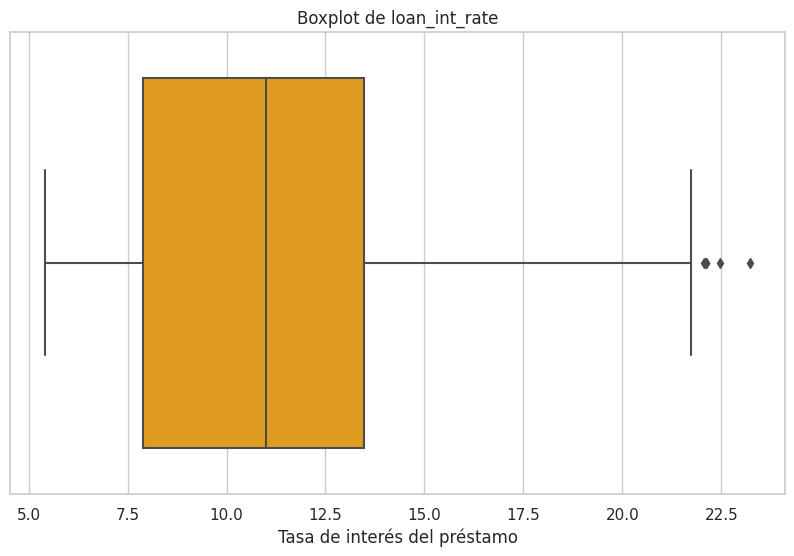

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0,0.26,N,4
29121,50,900000,MORTGAGE,11.0,DEBTCONSOLIDATION,B,30000,12.69,0,0.03,N,15
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [ ]:
# Boxplot para person_age
plt.figure(figsize=(10, 6))
sns.boxplot(x='person_age', data=df, color='blue')
plt.title('Boxplot de person_age')
plt.xlabel('Edad')
plt.show()

# Boxplot para loan_int_rate
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_int_rate', data=df, color='orange')
plt.title('Boxplot de loan_int_rate')
plt.xlabel('Tasa de interés del préstamo')
plt.show()

#******************
percentile_25 = df["person_age"].quantile(0.25)
percentile_75 = df["person_age"].quantile(0.75)
iqr = percentile_75 - percentile_25
upper_limit = percentile_75 + 1.5 * iqr
lower_limit = percentile_25 - 1.5 * iqr
IQR_outliers = df[(df["person_age"] < lower_limit) | (df["person_age"] > upper_limit)]
IQR_outliers

*   Como podrás observar hay valores atípicos en todas las variables. Ejecuta el siguiente código para identificar los valores atípicos en la variable `person_age`

In [ ]:
percentile_25 = df["person_age"].quantile(0.25)
percentile_75 = df["person_age"].quantile(0.75)
iqr = percentile_75 - percentile_25
upper_limit = percentile_75 + 1.5 * iqr
lower_limit = percentile_25 - 1.5 * iqr
IQR_outliers = df[(df["person_age"] < lower_limit) | (df["person_age"] > upper_limit)]
IQR_outliers

# Análisis de variables categóricas

 6. Obtén las siguientes estadísticas descriptivas para todas las variables categóricas:
*   Tendencia central (moda)
*   Cardinalidad (cantidad de valores únicos)
*   Recuentos únicos (número de ocurrencias para cada valor único)

**NOTA**. Un resumen de estas estadísticas, puedes obtenerlas indicando en la función `describe()` que se incluirán sólo las variables de tipo object, que en este caso coinciden con las categóricas: `describe(include = 'object')`. Para los recuentos utiliza la función `df["columna"].value_counts()`

In [ ]:
cat = df.select_dtypes(include='object')

# moda, categ y recuentos únicos
moda = cat.mode().iloc[0]
unicas = cat.nunique()
recuentos_unicos = cat.apply(pd.value_counts).fillna(0).astype(int)
print("Moda:")
print(moda)
print("\nCardinalidad:")
print(unicas)
print("\nRecuentos Únicos:")
print(recuentos_unicos)


Moda:
person_home_ownership             RENT
loan_intent                  EDUCATION
loan_grade                           A
cb_person_default_on_file            N
Name: 0, dtype: object

Cardinalidad:
person_home_ownership        4
loan_intent                  6
loan_grade                   7
cb_person_default_on_file    2
dtype: int64

Recuentos Únicos:
                   person_home_ownership  loan_intent  loan_grade  \
A                                      0            0       10777   
B                                      0            0       10451   
C                                      0            0        6458   
D                                      0            0        3626   
DEBTCONSOLIDATION                      0         5212           0   
E                                      0            0         964   
EDUCATION                              0         6453           0   
F                                      0            0         241   
G                      

7. Utiliza gráficos de barras por variable para representar la frecuencia de cada categoría.

**NOTA**. seaborn posee un gráfico de recuento, para variables categóricas, que calcula la frecuencia de cada categoría sin necesidad de utilizar la función `value_counts()`. Para generarlo debes indicar la columna: `sns.countplot(x="columna", data=df) `

# **Parte 2**. Análisis de correlación (bivariante y multivariante)

La variable `loan_status` será la variable de salida (o a predecir en un modelo de ML). Analiza su relación con el resto de las variables a través de los siguientes gráficos:

8. Un box plot para visualizar la distribución de `loan_percent_income` según el `load_status`. Interpreta el resultado.

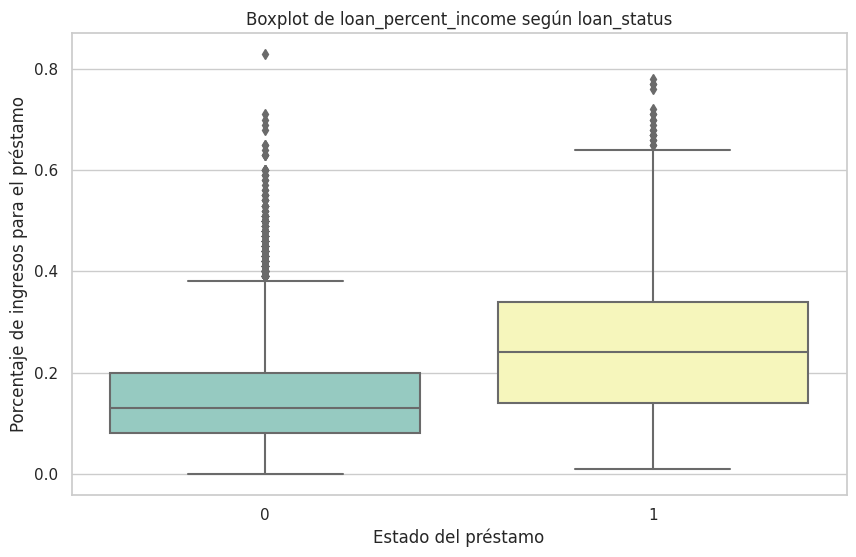

In [ ]:

# Boxplot de loan_percent_income según loan_status
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='loan_percent_income', data=df, palette="Set3")
plt.title('Boxplot de loan_percent_income según loan_status')
plt.xlabel('Estado del préstamo')
plt.ylabel('Porcentaje de ingresos para el préstamo')
plt.show()

 9. En los gráficos de barras que obtuviste en el ejercicio 7, separa el conteo según el `load_status`, utilizando el parámetro `hue`.

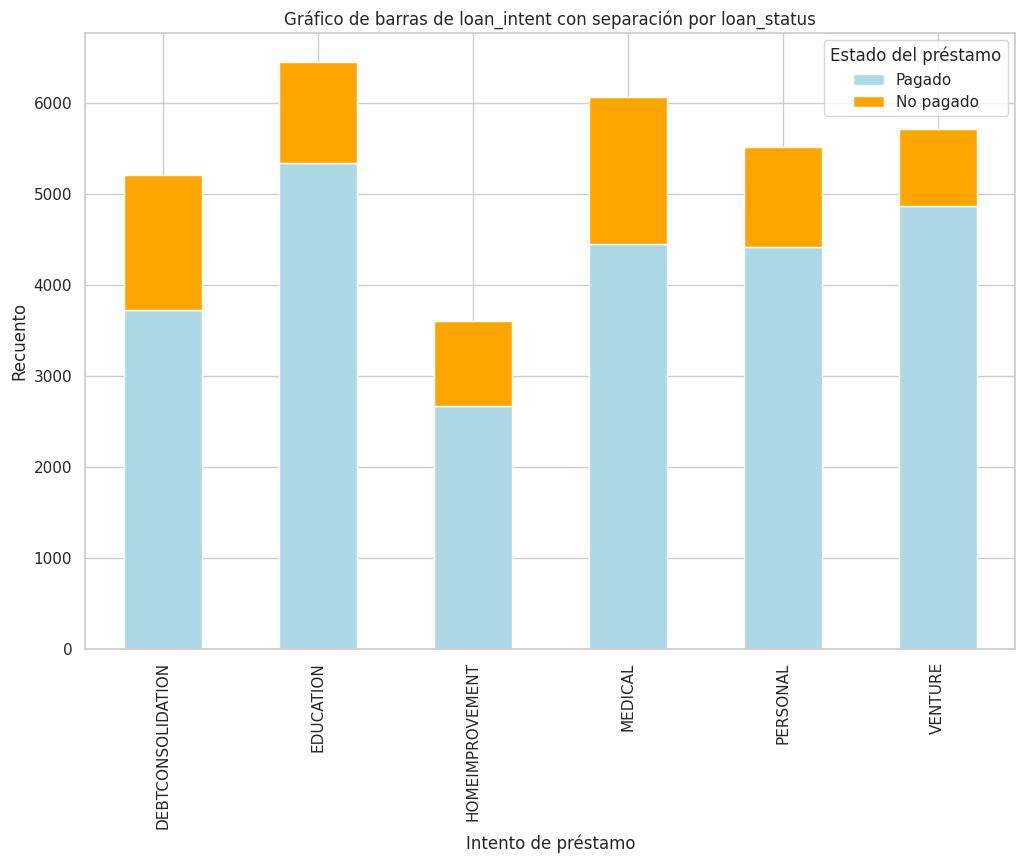

In [ ]:
import matplotlib.pyplot as plt
conteo_por_estado = df.groupby(['loan_intent', 'loan_status']).size().unstack()

# Gráfico  loan_intent vs separación por loan_status
conteo_por_estado.plot(kind='bar', stacked=True, color=['lightblue', 'orange'], figsize=(12, 8))

plt.title('Gráfico de barras de loan_intent con separación por loan_status')
plt.xlabel('Intento de préstamo')
plt.ylabel('Recuento')
plt.legend(title='Estado del préstamo', labels=['Pagado', 'No pagado'])
plt.show()


10. Un mapa de calor con los valores de correlación de todas las variables del dataframe.
*   ¿Qué variable tiene mayor correlación con `loan_status`?

<ipython-input-37-9aa0820d027c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacion = df.corr()


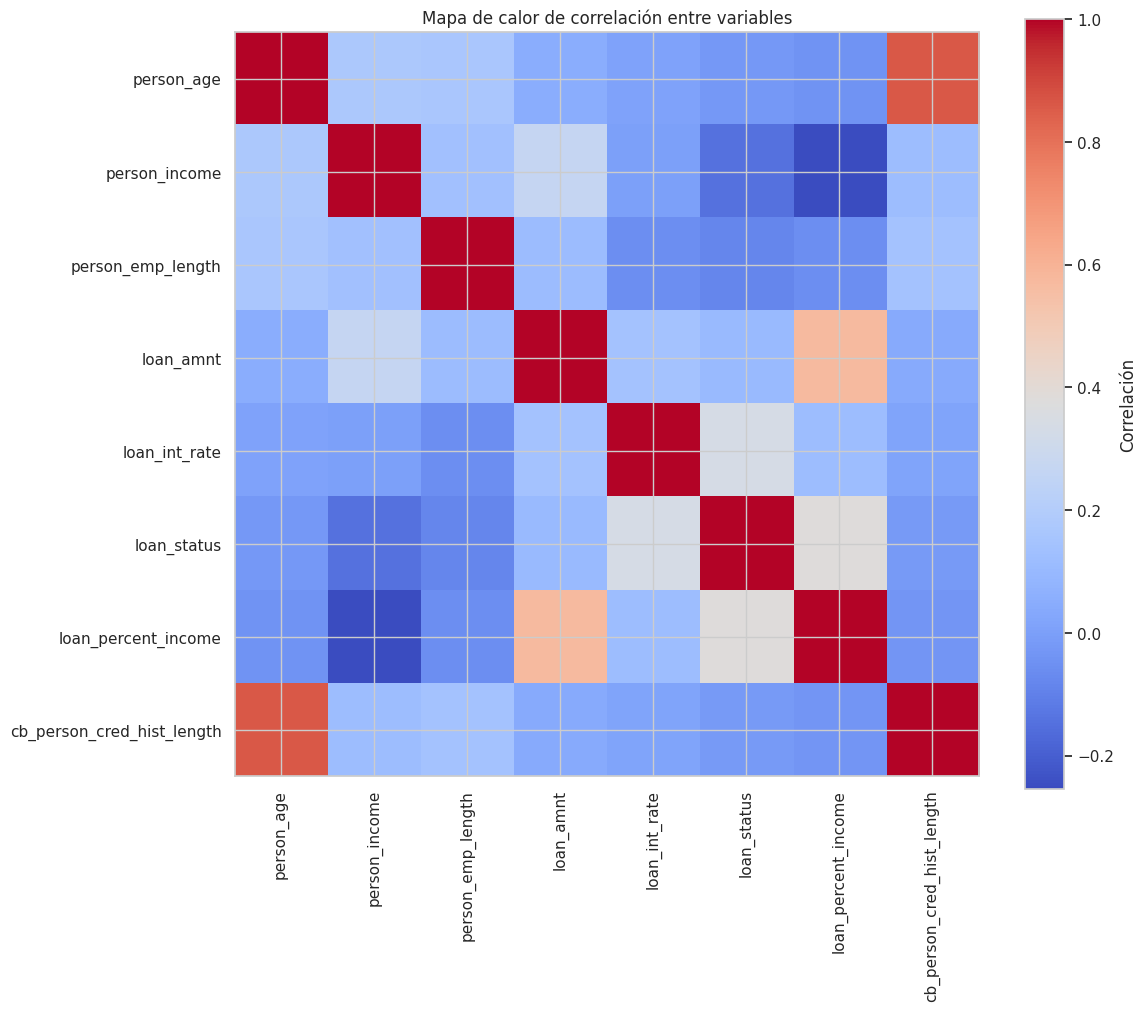


Variable con mayor correlación con loan_status: loan_percent_income
Valor de correlación: 0.37936646846126054


In [ ]:
# Calcula la matriz de correlación
matriz_correlacion = df.corr()
# dibujo del mapa de calor
plt.figure(figsize=(12, 10))
plt.imshow(matriz_correlacion, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlación')
plt.xticks(range(len(matriz_correlacion)), matriz_correlacion.columns, rotation=90)
plt.yticks(range(len(matriz_correlacion)), matriz_correlacion.columns)
plt.title('Mapa de calor de correlación entre variables')
plt.show()

# Encuentra la variable con mayor correlación con loan_status
correlacion_loan_status = matriz_correlacion['loan_status'].abs().sort_values(ascending=False)
variable_mayor_correlacion = correlacion_loan_status.index[1]  # Ignoramos loan_status en sí mismo
mayor_correlacion = correlacion_loan_status.iloc[1]

# Imprime la información
print(f"\nVariable con mayor correlación con loan_status: {variable_mayor_correlacion}")
print(f"Valor de correlación: {mayor_correlacion}")
